In [1]:
from IPython import display
import matplotlib.pyplot as plt
import cPickle as pickle
import numpy as np
from keras.models import load_model
from keras.datasets import cifar10

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
def plotRecord(pickle_file):
    with open(pickle_file, 'rb') as f:
        losses = pickle.load(f)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.figure(figsize=(10,8))
    plt.plot(losses["disc"], label='discriminitive loss')
    plt.plot(losses["gen"], label='generative loss')
    plt.plot(losses["acc_real"], label='discriminator accuracy on real images')
    plt.plot(losses["acc_gen"], label='discriminator accuracy on generated images')
    plt.plot(losses["acc_unl"], label='discriminator accuracy on unlabeled images')
    plt.legend()
    # plt.ylim([0, 4])
    plt.show()

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def plotOriginalImages(image_class):
    samples = 0
    sample_indices = []
    while samples < 16:
        sample_index = np.random.randint(0, X_train.shape[0])
        if y_train[sample_index] == image_class:
            sample_indices.append(sample_index)
            samples += 1

    plt.figure(figsize=(10, 3))
    f = 0
    for index in sample_indices:
        f += 1
        plt.subplot(2, 8, f)
        img = X_train[index,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
def plotGeneratedImages(generator_file):
    generator = load_model(generator_file)
    
    noise = np.random.uniform(0,1,size=[16,100])
    generated_images = generator.predict(noise)

    plt.figure(figsize=(10, 3))
    for i in range(generated_images.shape[0]):
        plt.subplot(2, 8, i+1)
        img = generated_images[i,:,:,:]
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

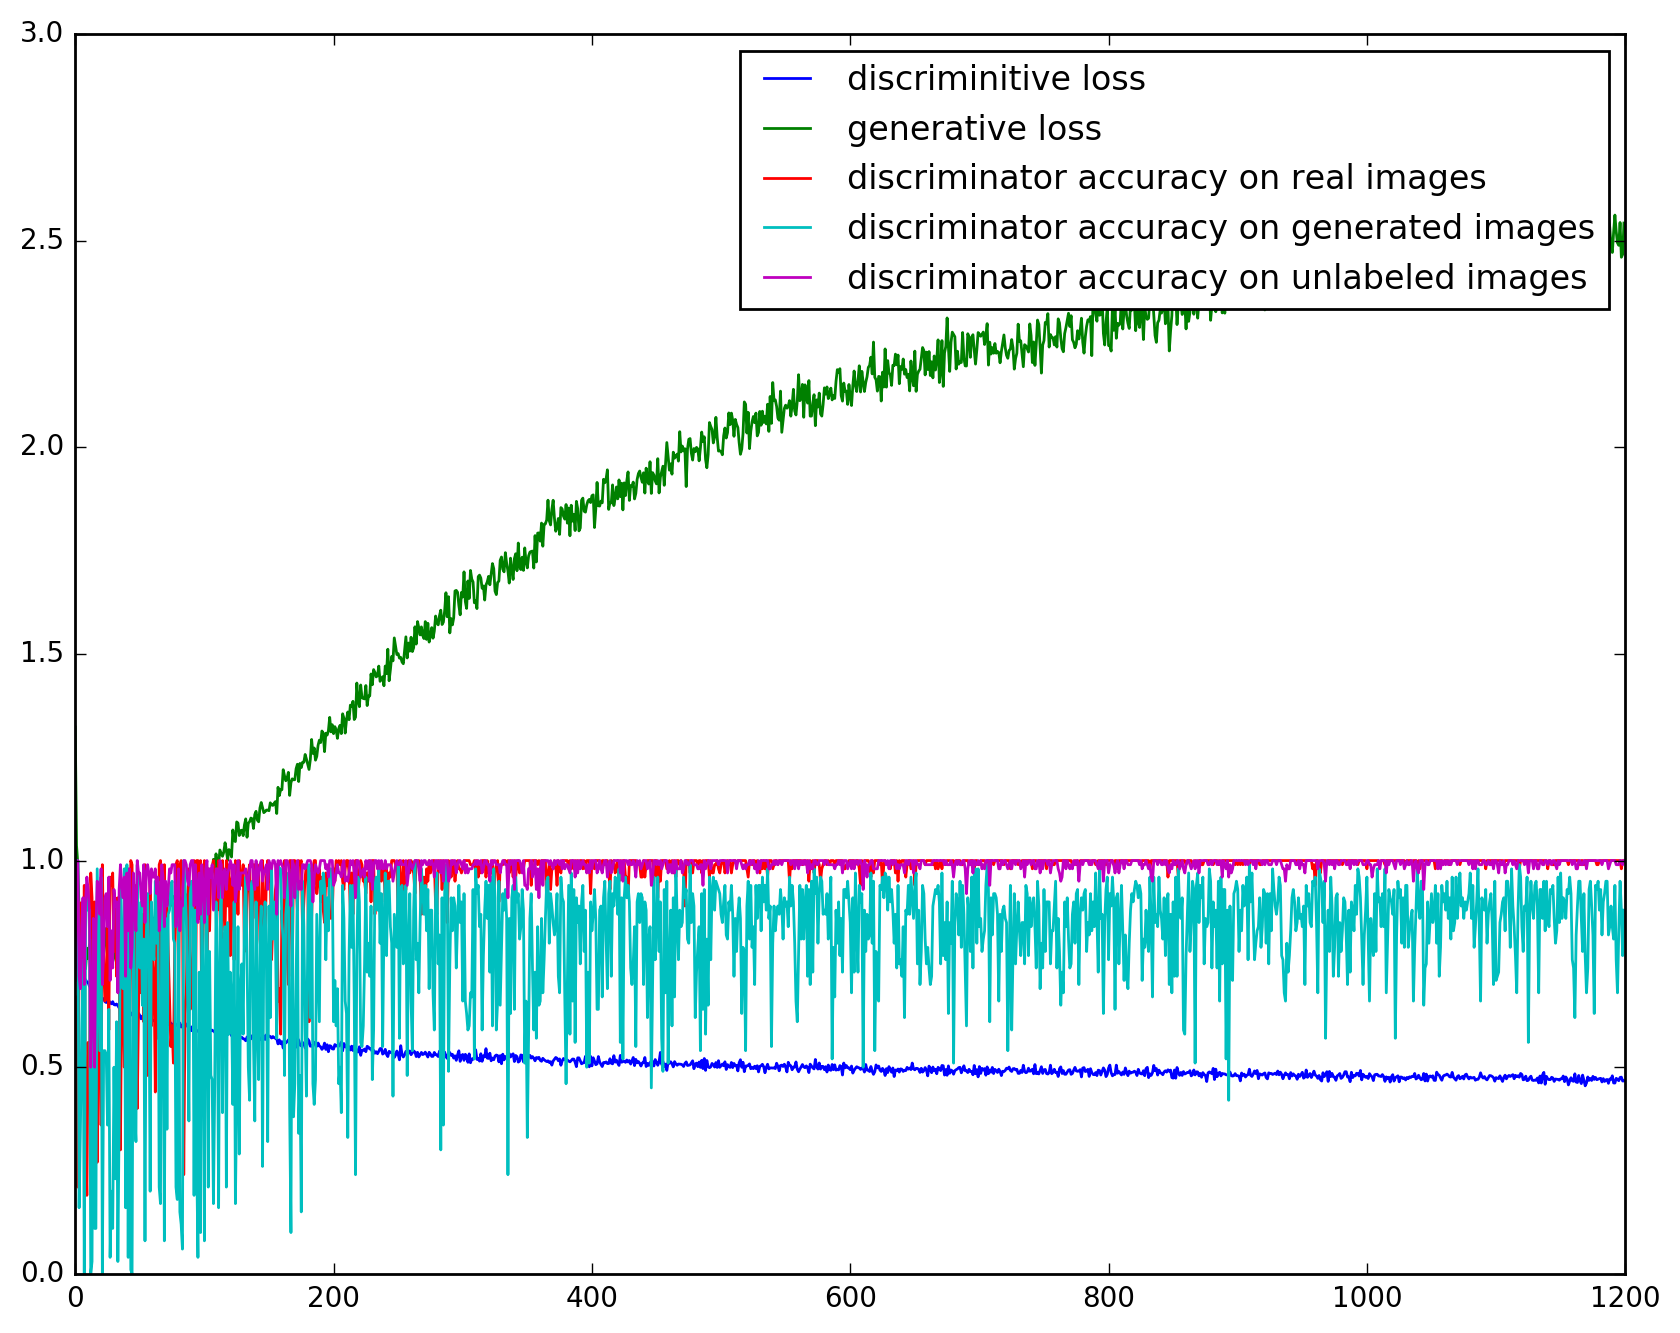

In [103]:
plotRecord('record0-1200.pickle')

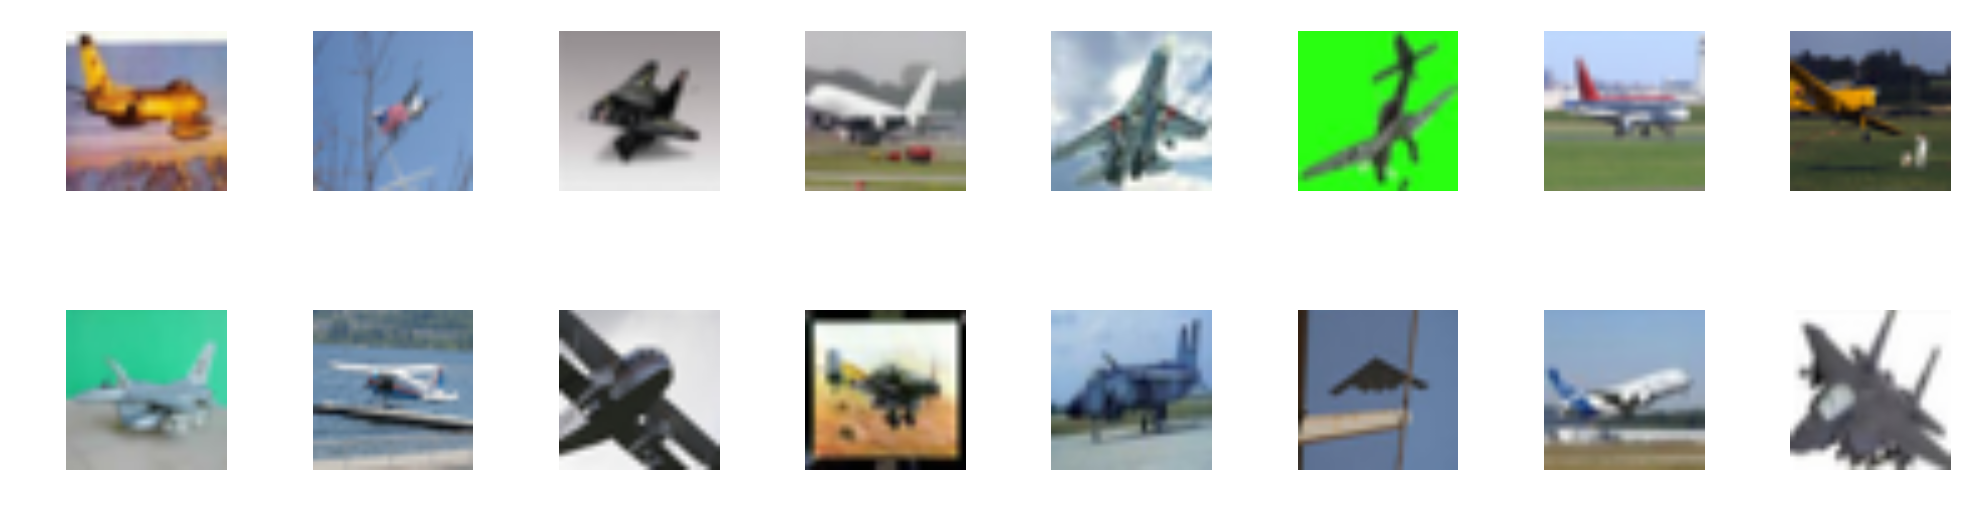

In [111]:
plotOriginalImages(0)

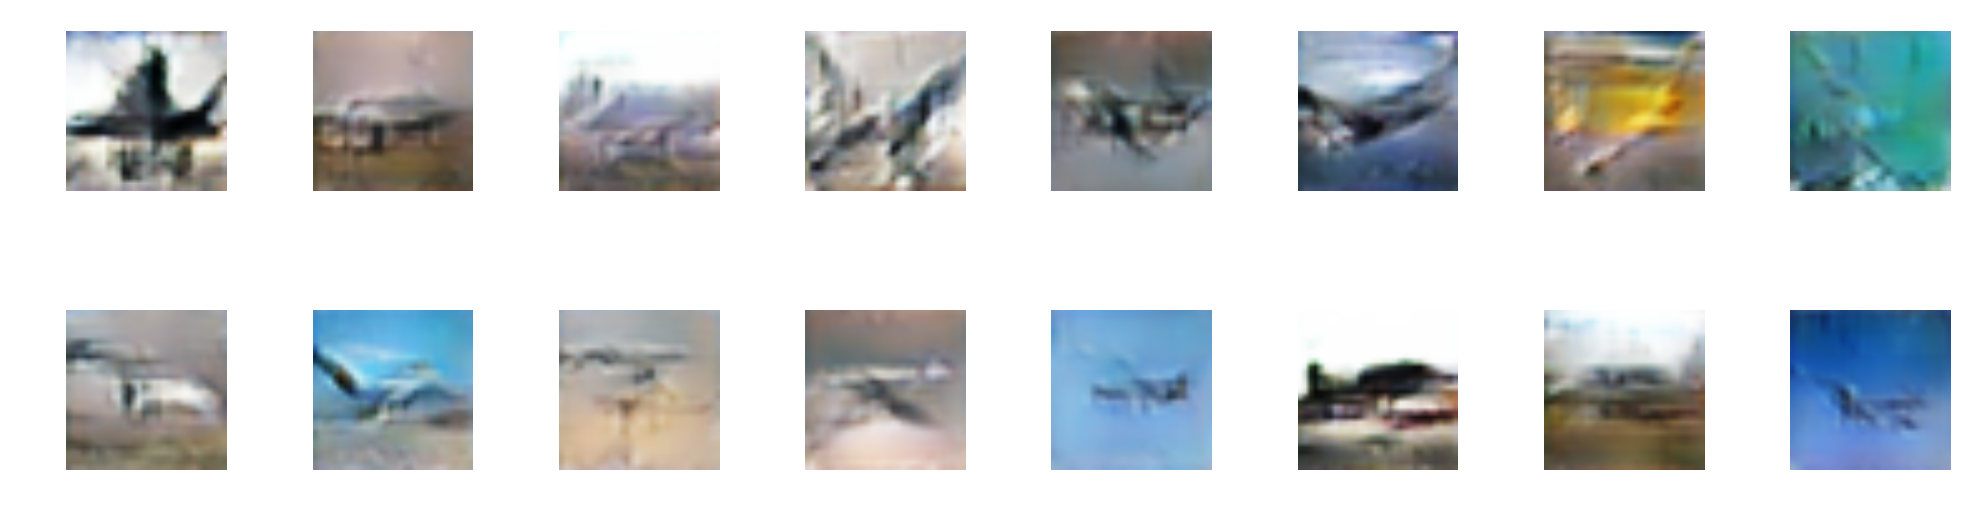

In [104]:
plotGeneratedImages('gen0-120.h5')

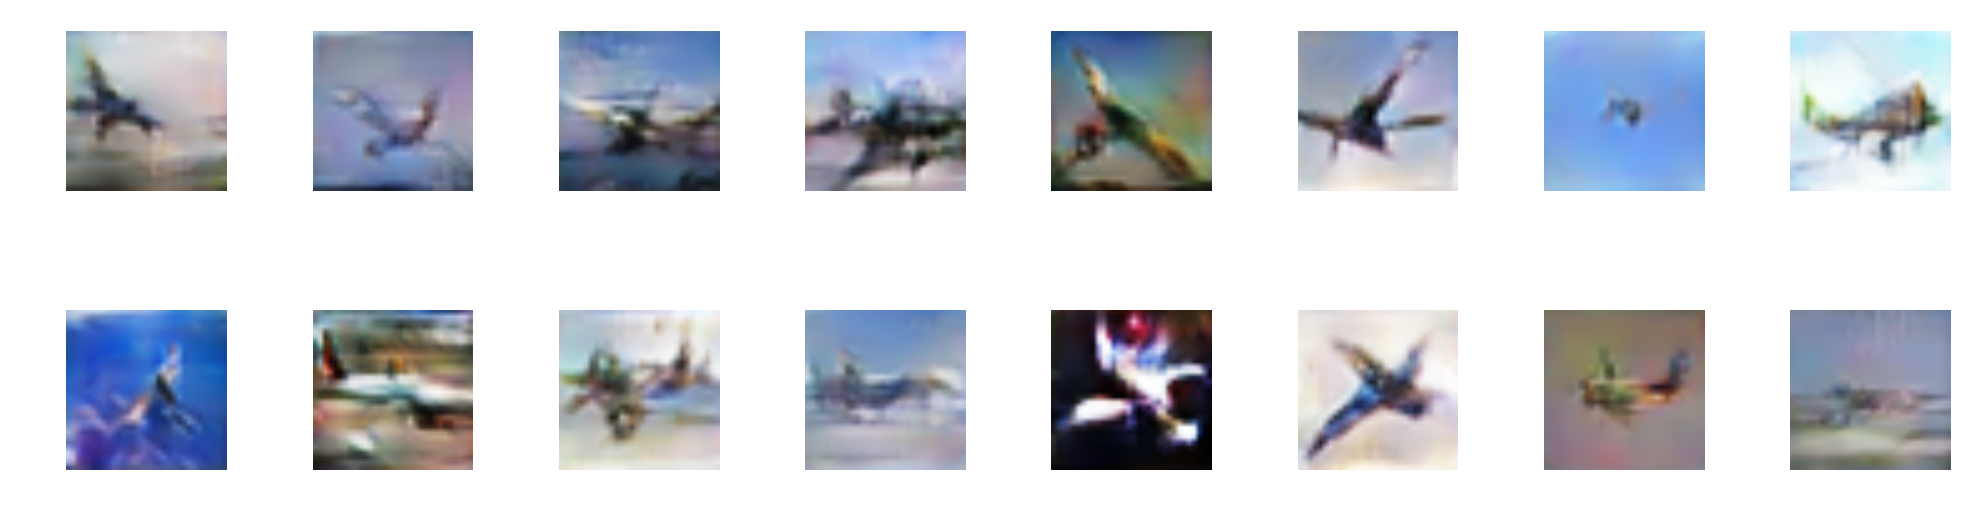

In [105]:
plotGeneratedImages('gen0-1200.h5')

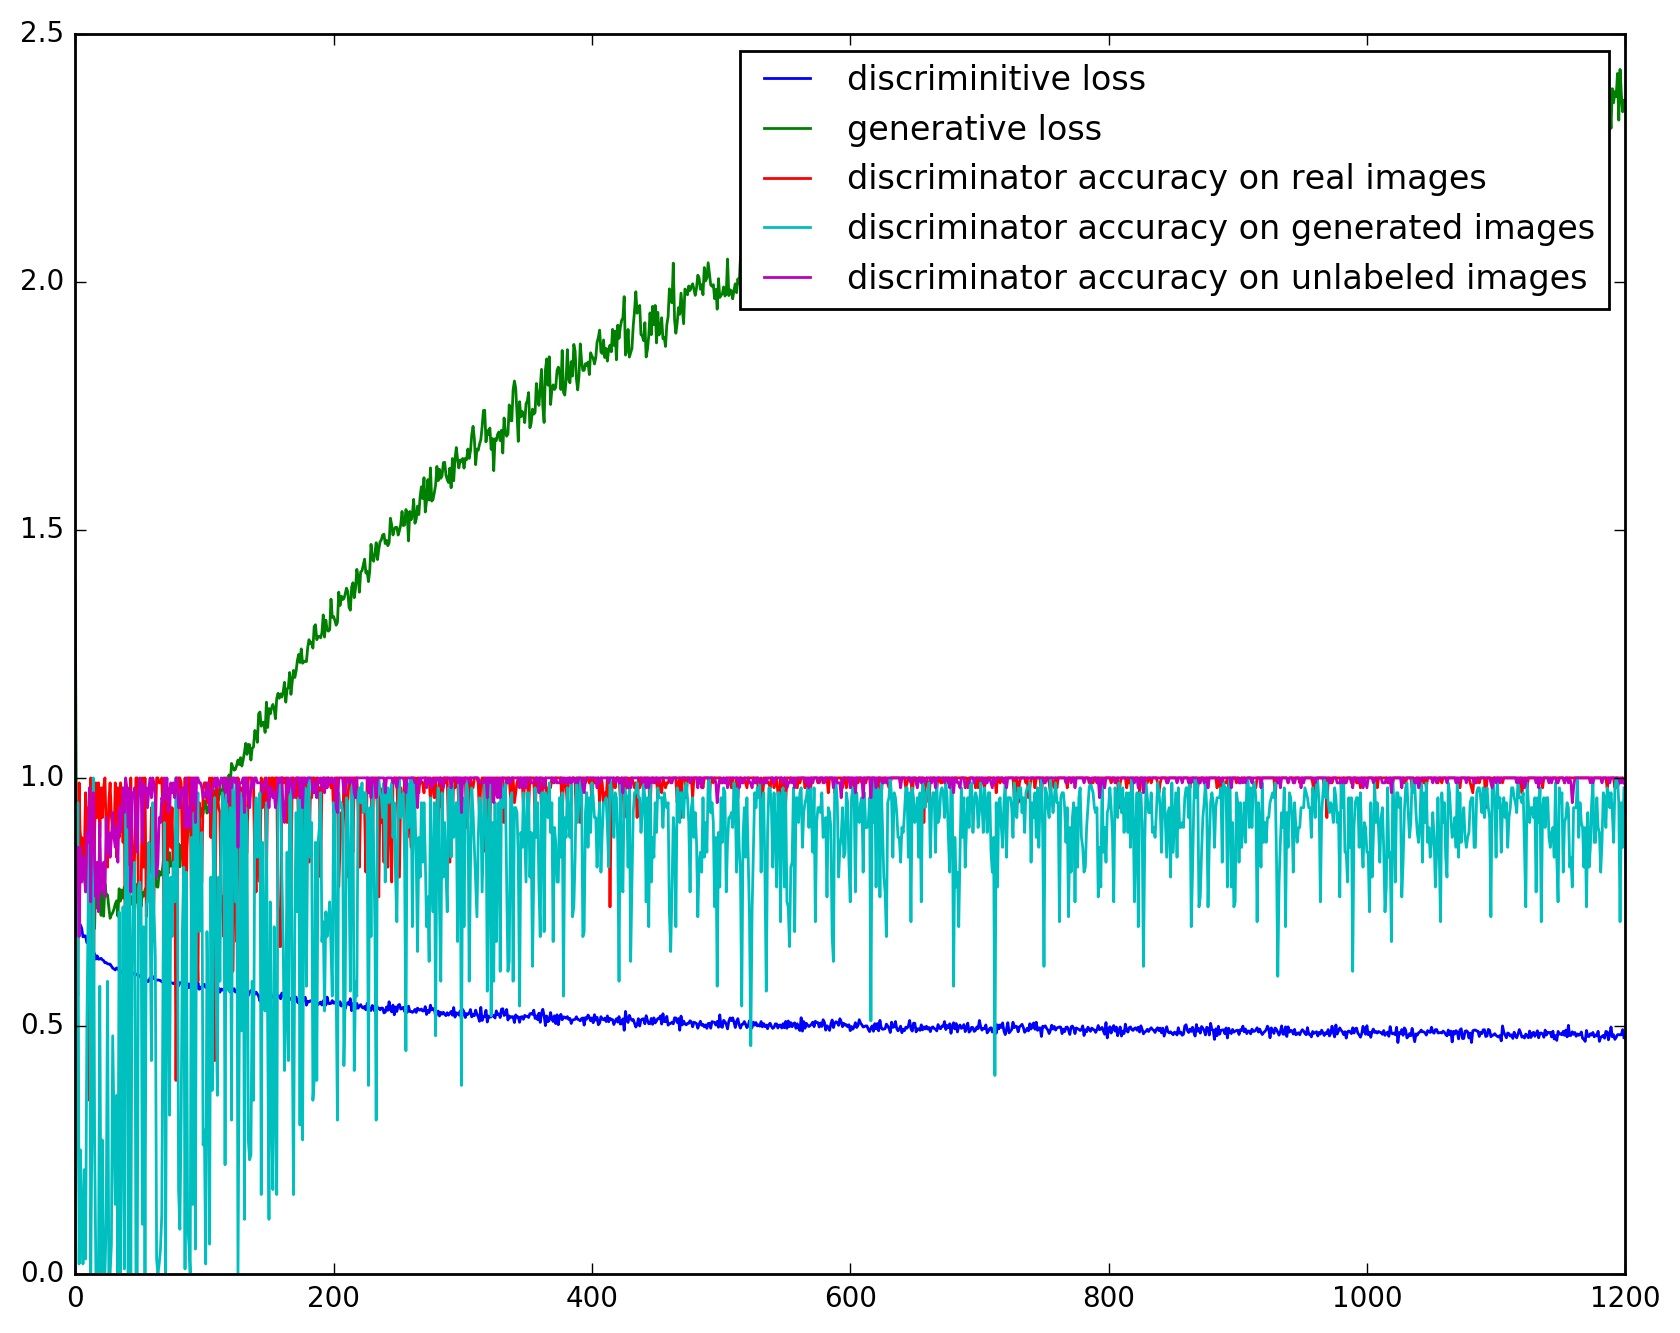

In [5]:
plotRecord('record1-1200.pickle')

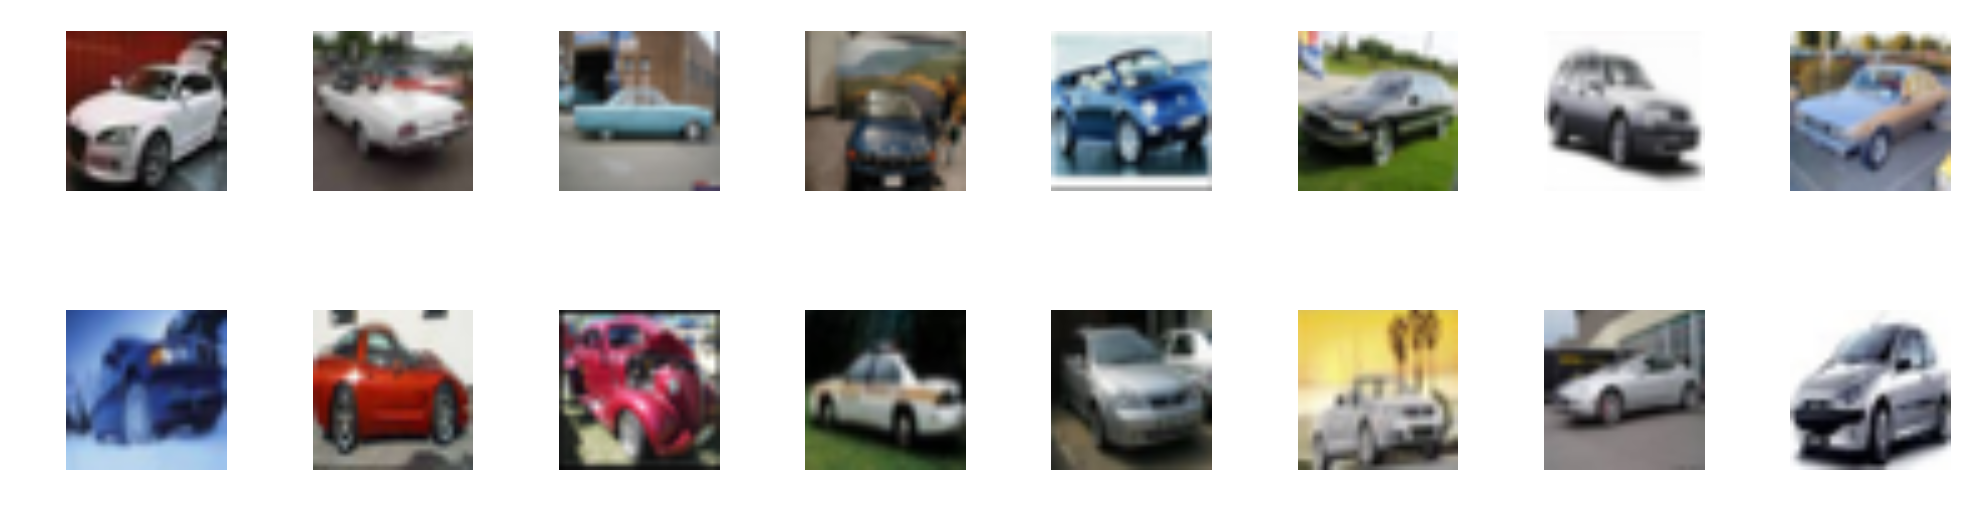

In [6]:
plotOriginalImages(1)

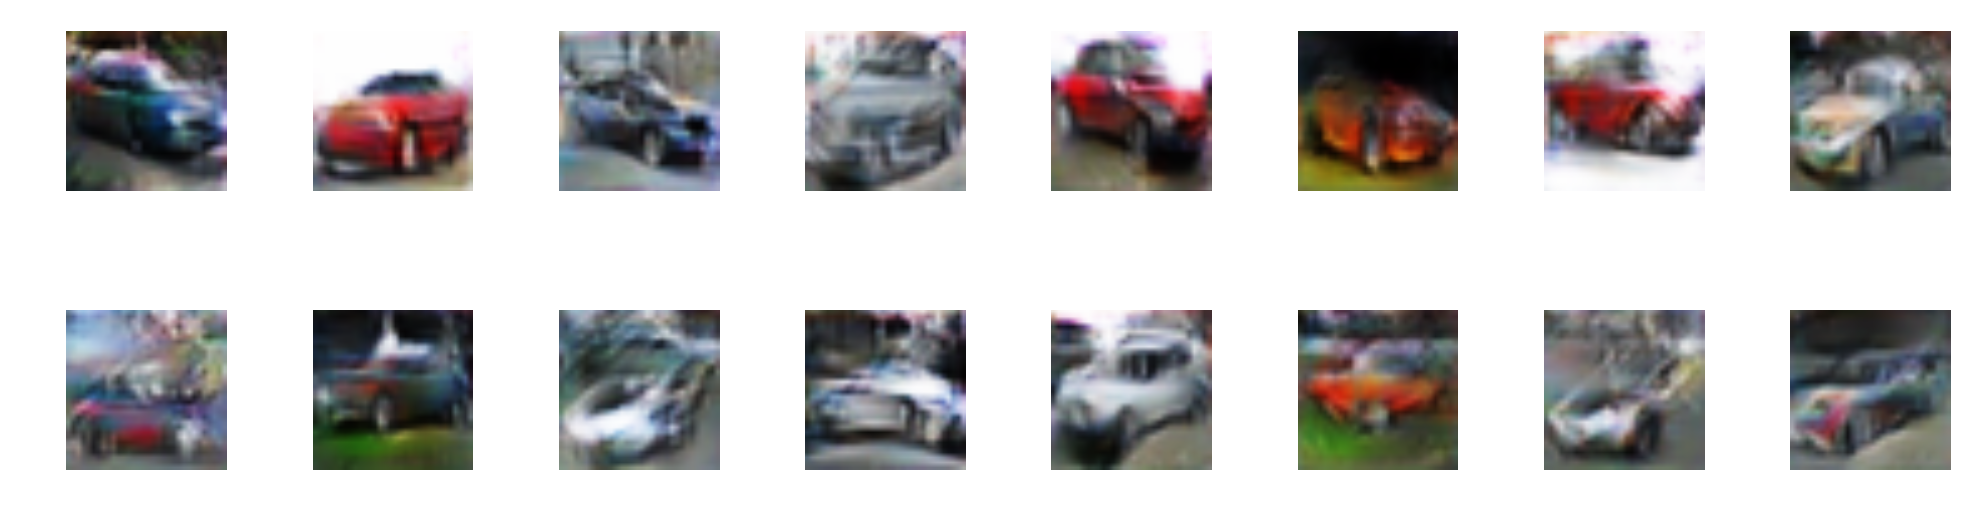

In [7]:
plotGeneratedImages('gen1-120.h5')

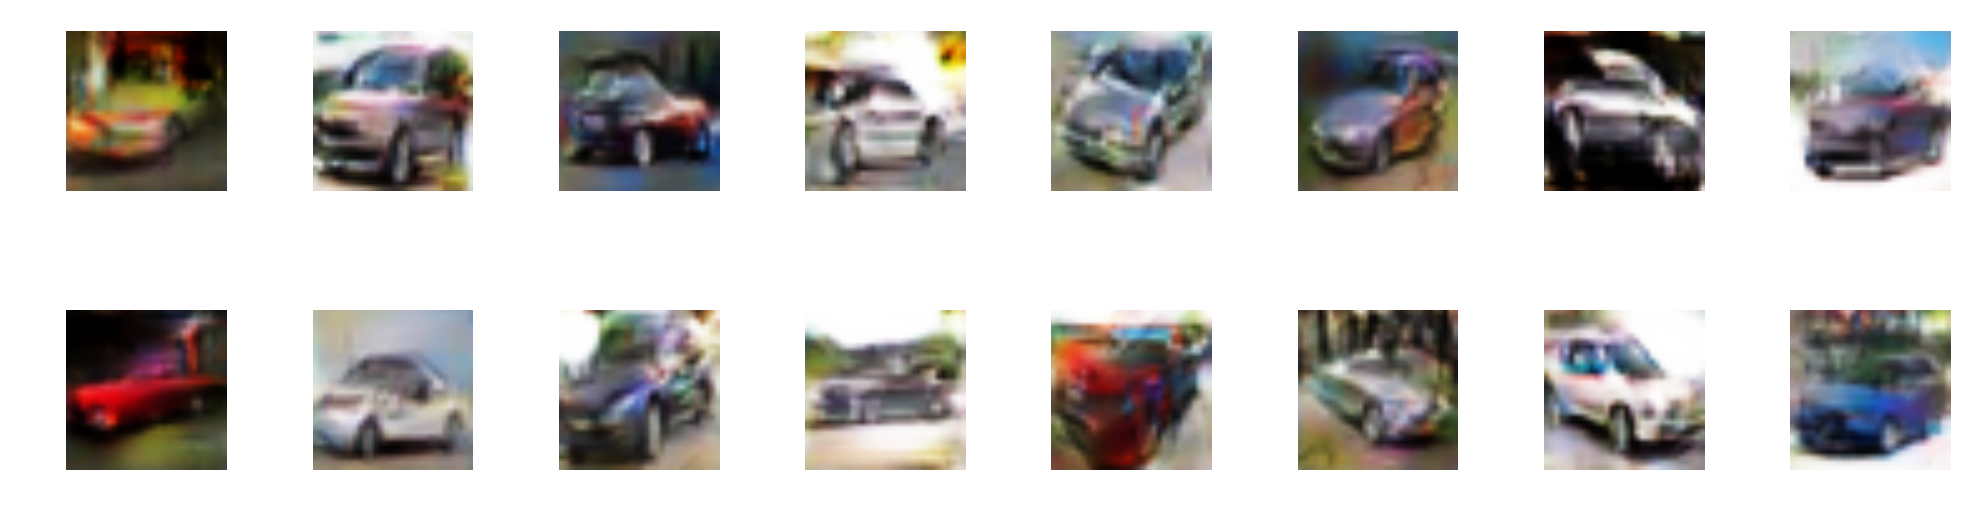

In [8]:
plotGeneratedImages('gen1-1200.h5')

In [ ]:
plotRecord('record2-1200.pickle')

In [ ]:
plotOriginalImages(2)

In [ ]:
plotGeneratedImages('gen2-120.h5')

In [ ]:
plotGeneratedImages('gen2-1200.h5')

In [ ]:
plotRecord('record3-240.pickle')

In [ ]:
plotOriginalImages(3)

In [ ]:
plotGeneratedImages('gen3-240.h5')

In [ ]:
plotGeneratedImages('gen3-1200.h5')